Scientific Computing Coursework EMAT30008

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from Archive.OldODEsolver import solve_odes, error_difference, func1, true_euler_number

Ordinary Differential Equation solver
-------------------------------------

The purpose of this software is to solve an ordinary differential equation (ODE) or system of ODEs using either the Euler method or the fourth order Runge-Kutta (RK4) method. The script uses three functions to do this, euler_step, RK4_step and solve_odes. The euler_step and RK4_step have the same function, they recieve an ODE as an input coupled with an initial x and time value and return an updated x and time value. The solve_odes function takes the ODE system as an input, along with a starting value of x, a starting time value, a maximum step size and a solver option which is set to RK4 as a default. The solve_odes funciton, calculates the number of steps, and iterates over the steps, implementing either RK4 or euler at each time step and adding the solutions to an array of numerical solutions to the ODE system. The solve_odes also receives an any number of keyword arguments with the use of the optinal keyword arguments **kwargs. I decided to use **kwargs instead of *args as it is convenient to be able to explicitly define the optional inputs to functions and is easier to see visually what is being inputted. 

I have also created an error difference function which compares the accuracy of the euler and RK4 methods applied to the ODE x. = x (which is the definition of the mathematical constant Eulers number.) I am therefore evaluating the accuracy using the absolute difference between the solution at increasing time step and the true value (np.exp). 

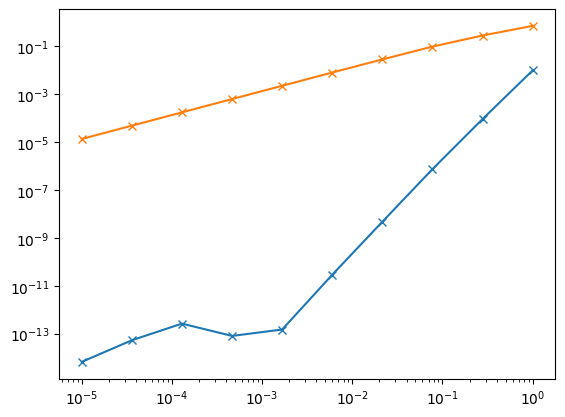

In [9]:
pars = 1
error_difference(func1, x0=1, t0=0, t1=1, true_solution = true_euler_number, pars = pars)

The RK4 method is expectedly more accurate than the euler method as step size increases. This is because the RK4 method is a fourth order method. The graph provides evidence that both methods are suitable integrators however, as the error is very small for a small step size for each method. Due to computation costs, only a small range of step sizes was investigated, using a small amount of evaluation points. To test for truncation and global errors, it would be worthwhile to increase the range of solutions and use a larger amount of evaluation points. 

Observing the graph above, it is evident that the euler and rk4 methods have a similar error value when the time step for rk4 method =1 and the time step for the euler method = 0.01. To calculate the time difference between these two methods, I used the following code. The difference in times was very small, I would likely use the RK4 method in future as the RK4 method is more accurate than the Euler method because it uses higher-order approximations of the solution, which results in smaller truncation errors. 

In [ ]:
import time

time.perf_counter()
ansEuler, tEuler = solve_odes(euler_number, x0=1, t0=0, t1=20, dt_max=0.01, solver = 'euler')
end_timeEuler = time.perf_counter()

time.perf_counter()
ansRK4, tRK4 = solve_odes(euler_number, x0=1, t0=0, t1=20, dt_max=1, solver = 'rk4')
end_timeRK4 = time.perf_counter()

print(end_timeEuler, end_timeRK4)

Using a large value of dt_max to solve d_xx = -x produces a plot that demonstrates decreasing accuracy over time. 

In [ ]:
from ExampleFunctions import func2

sol, t = solve_odes(func2, x0=[0.5,0.5], t0=0, t1=100, dt_max=1)
plt.plot(sol)
plt.show()

In future, I would like to implement other one step methods and do other things

Numerical Shooting
------------------
The numerical shooting software, solves boundary value ODE problems, using my numerical integrator solve_odes and the root finder fsolve. The code begins with a phase portrait plotting function which is useful to visualise the phase of a function. My iso_orbit function uses the signal library from scipy to determine if a limit cycle exists for the function, what its starting conditions are and the time period of the cycle. This function is vital for ensuring the shooting function works as it provides me with solutions to test against, and allowed me to provide the shooting function with suitable initial guesses. The shooting function solves a boundary value problem for an ODE system using the shooting method. It takes two arguments: f is a function defining the ODE system, and phase_cond is a function defining the boundary conditions to be satisfied. It returns a function G that takes an initial guess u0T for the solution and a dictionary of parameters, and returns the difference between the actual and guessed boundary conditions.

The G function defines another function F that solves an IVP with the shooting method using the guessed initial condition and final time value. It returns the final solution, which is compared to the actual boundary condition in the G function. The G function computes the difference between the guessed initial condition and the solution obtained by F, and appends the difference between the actual boundary condition and the guessed boundary condition computed by phase_cond. The resulting numpy array represents the residuals between the boundary conditions and the solution obtained by the shooting method.

Improvements:

Add type annotations.
Allow for the specification of shooting parameters.
Add error checking and exception handling.
Limitations:

Assumes a well-posed problem with a numerically solvable ODE system.
No options for selecting or adjusting the shooting parameter.
The solve_odes function called by F is not defined in the code snippet provided.


The find shooting orbit is useful for the user as it is more apparent how to use it. Find shooting orbit completes the root finding step of shooting useing fsolve. In future I would use other root finding methods other than fsovle. To plot the long term behaviour of the predator prey function for different parameters, I used the code:

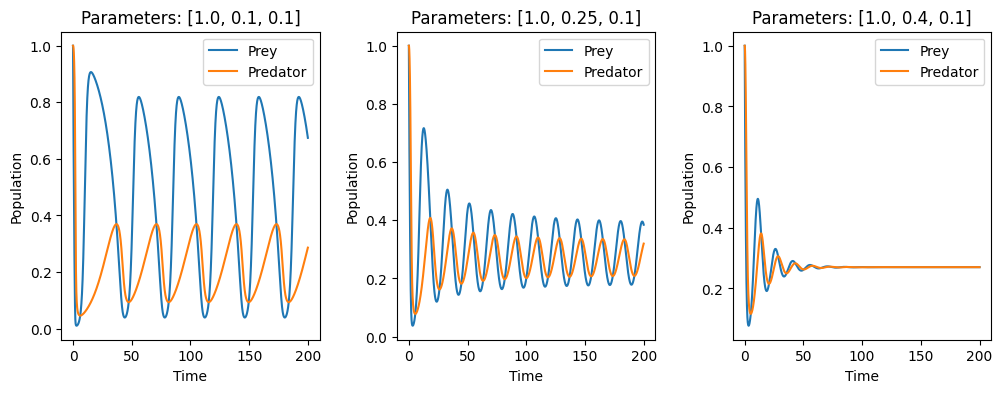

In [2]:
from ODEsolver import plot_different_parameters
from ExampleFunctions import predator_prey

params = [[1.0, 0.1, 0.1], [1.0, 0.25, 0.1], [1.0, 0.4, 0.1]]
plot_different_parameters(predator_prey, x0=[1,1], t0=0, t1=200, dt_max=0.01, params=params)

In the predator-prey function, when b is less than 0.25, the populations oscillate periodically for infinite time, whereas when b is greater than 0.25, the populations reach a stable equilibrium. 

Though my code is generalised for use with any phase condition, I typically use the phase condition of dx/dt(0) = 0 because there is at least one point along the limit cycle where d𝑑𝑥
𝑑𝑡
(0) is true. The function returns the value of
𝑑𝑥
𝑑𝑡
at time = 0. To implement iso_orbit, I run the code and get the values...

In [ ]:
from NumericalShooting import iso_orbit

pars = [1.0, 0.2, 0.1]
orbit = iso_orbit(predator_prey, x0=[1,1], t0=0, t1=500, dt_max=0.01, pars=[1.0,0.2,0.1])
print('The true values of the predator prey orbit:', orbit)

Using the values from iso_orbit as a reasonable approximate guess and using the phase condition from earlier, I can implement numerical shooting using

In [3]:
from NumericalShooting import find_shoot_orbit
from ExampleFunctions import pred_prey_pc

u0T = [0.6, 0.3, 20]
pars = [1.0, 0.2, 0.1]
shooting_orbit = find_shoot_orbit(predator_prey, pred_prey_pc, u0T, pars)
print('The shooting values of the predator prey orbit: ', shooting_orbit)

NameError: name 'pars' is not defined

To further test the limtis of my code, I decided to test the Hopf bifurcation normal form ODE against its analytical solution for when sigma = -1, a supercritical Hopf bifurcation. 

In [ ]:
from ExampleFunctions import hopf, hopf_pc

pars = [0.3, -1]
orbit = iso_orbit(hopf, [1,1], 0, 200, 0.01, pars=pars)
print('The true values of the hopf orbit:', orbit)

# Using the true values from before to provide an initial guess
u0T = [0.6, 0.001, 6]
shooting_orbit = find_shoot_orbit(hopf, hopf_pc, u0T, pars)
print('The shooting values of the hopf orbit: ', shooting_orbit)

DO CODE TESTING HERE

Numerical Continuation
----------------------
Numerical continuation is used to investigate how the solution to a system of ODEs depend 
on the varying values of a parameter. Numerical continuation can either be used to find 
roots of polynomials, initial conditions in ODEs, or steady states in PDEs. This code defines a function natural_continuation that performs a natural continuation analysis on a system of ordinary differential equations (ODEs) given by a function f as a function of a specified parameter. The function first sets up a list of parameter values between min_par and max_par with a total of no_steps values. Then, depending on the discretisation option (either 'shooting' or 'fsolve'), it either uses a shooting method or a root-finding method to compute the solution of the ODEs at each parameter value.

If the phase_cond option is specified as anything other than 'None', the shooting method is used and the find_shoot_orbit function is called to solve the ODEs with the specified phase condition. Otherwise, the root-finding method fsolve is used with an initial guess for the solution u0, and the solution at each parameter value is used as the initial guess for the solution at the next parameter value to ensure convergence.

The function returns a tuple containing two arrays: the first contains the solutions of the ODE system for each parameter value, and the second contains the corresponding parameter values.

One potential improvement could be to allow for additional input arguments to be passed to the fsolve function, as these could be useful in some cases. Additionally, the function could be made more flexible by allowing the user to specify which root-finding method to use instead of hard-coding fsolve.

One potential drawback is that the natural_continuation function assumes that the system of ODEs given by f is well-behaved and does not handle cases where the ODEs are ill-behaved, such as when there are singularities or discontinuities in the solution. The algebraic cubic equation does not require shooting. I use this code

In [ ]:
from NumericalContinuation import natural_continuation
from ExampleFunctions import cubic

results, pars = natural_continuation(cubic, 0, -2, 2, 30)
plt.plot(-pars, -results)
plt.xlabel('c')
plt.ylabel('x')
plt.show()

I also use the hopf bifurcation to test my code. I use norm to get the right sol as there is a bifuraction

In [ ]:
from ExampleFunctions import hopf_bif, hopf_bif_pc

results, pars = natural_continuation(hopf_bif, [1.2, 1.0, 4], -1, 4, 30, hopf_bif_pc)
norm_np_sol_list = np.linalg.norm(results[:, :-1], axis = 1)
#plt.plot(pars, results[:,0], 'bx-')
#plt.plot(pars,results[:,1],'rx-')
plt.plot(pars, norm_np_sol_list, 'rx')
plt.xlabel('beta value')
plt.ylabel('||x||')
plt.show()